In [1]:
import numpy as np

coords = []

with open("input.txt") as inp:
    for line in map(lambda x: x.rstrip(), inp.readlines()):
        left, right = sorted(line.split(", "))
        assert "x" in left
        assert "y" in right
        x_split = right.split("=")[-1].split("..")
        x_min, x_max = map(int, [x_split[0], x_split[-1]])
        y_split = left.split("=")[-1].split("..")
        y_min, y_max = map(int, [y_split[0], y_split[-1]])
        coords.append((x_min, x_max, y_min, y_max))

coords = np.array(coords)
x_coord_min = min(coords[:, 0])
x_coord_max = max(coords[:, 1]) + 1
y_coord_min = min(min(coords[:, 2]), 500) - 1
y_coord_max = max(max(coords[:, 3]), 500) + 1

x_range = x_coord_max
y_range = y_coord_max - y_coord_min

field = np.zeros((x_range, y_range + 2), dtype=object)
field.fill(".")
coords[:, 2:] -= y_coord_min

for coord in coords:
    if coord[0] == coord[1]:
        field[coord[0], coord[2]:coord[3] + 1] = "#"
    else:
        field[coord[0]:coord[1] + 1, coord[2]] = "#"

start = (0, 500 - y_coord_min - 1)
field[start] = "+"

def find_left_border(i, j):
    while field[(i + 1, j)] in "~#":
        if field[(i, j - 1)] == "#":
            return j
        j -= 1
    return j + 1


def find_right_border(i, j):
    while field[(i + 1, j)] in "~#":
        if field[(i, j + 1)] == "#":
            return j
        j += 1
    return j - 1


def fill(pos):
    global field
    i, j = pos
    while True:
        left_border = find_left_border(i, j)
        right_border = find_right_border(i, j)
        if field[i, left_border - 1] == "#" and field[i, right_border + 1] == "#":
            field[i, left_border:right_border + 1] = "~"
        else:
            field[i, left_border:right_border + 1] = "|"
            if field[i, left_border - 1] != "#":
                go_down((i, left_border - 1))
            if field[i, right_border + 1] != "#":
                go_down((i, right_border + 1))
            break
        i -= 1


def go_down(pos):
    i, j = pos
    while True:
        field[i][j] = "|"
        if i + 1 == x_coord_max:
            break
        if field[i+1][j] == "|":
            break
        if field[i + 1, j] in "#~":
            fill((i, j))
            break

        i += 1


def string_field():
    for line in field:
        print(''.join(list(line)))


go_down(start)
flatten_field = list(field[x_coord_min:].flatten())
remain = flatten_field.count("~")
will_dry = flatten_field.count("|")

print("part 1:", remain + will_dry)
print("part 2:", remain)

part 1: 34244
part 2: 28202


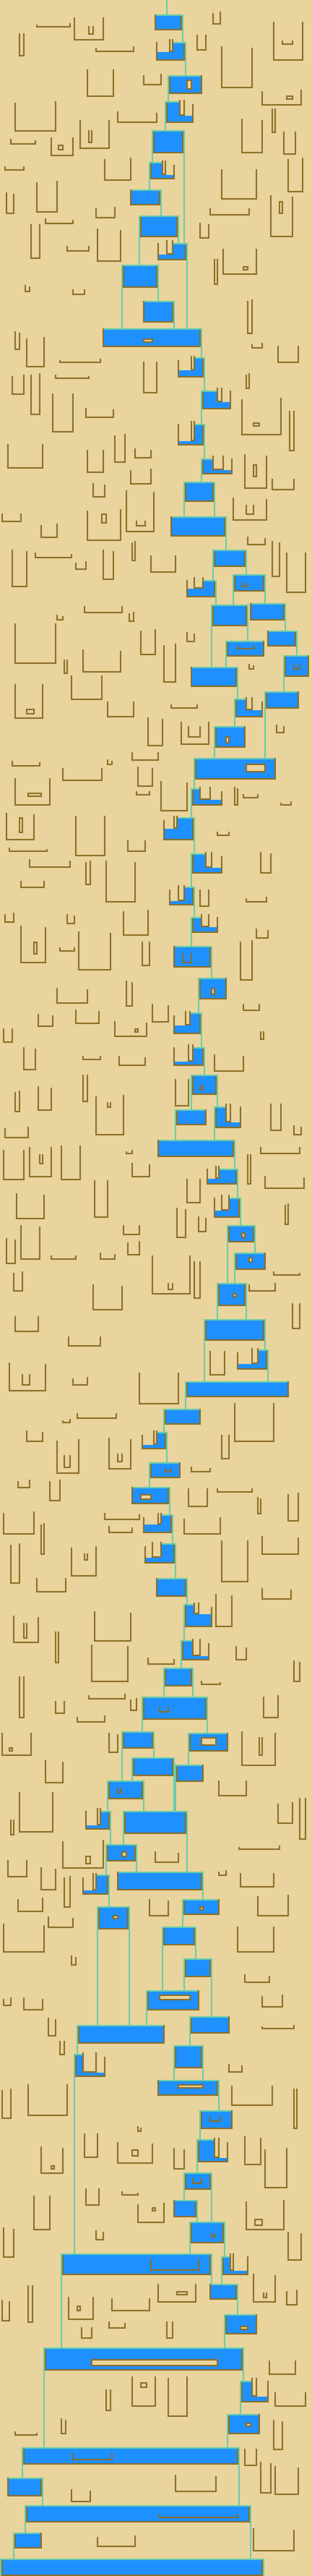